<a href="https://colab.research.google.com/github/devadethan452/ICT.DSA.DEVADETH/blob/main/IRIS_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
##importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READ DATASET

In [20]:
##read dataset
data = pd.read_excel('/content/drive/MyDrive/DSA DATASETS/iris (1).xls')

UNDERSTANDING DATASET

In [21]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data.shape

(150, 5)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
data.isna().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


HANDLING MISSING VALUES

In [25]:
for i in data.select_dtypes(include='number').columns:
  data[i]=data[i].fillna(data[i].mean())

In [26]:
data.select_dtypes(include='number').isna().sum()

,0
SL,0
SW,0
PL,0
PW,0


ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Classification'] = labelencoder.fit_transform(data['Classification'])

In [28]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [29]:
data['Classification'].unique()

array([0, 1, 2])

In [30]:
x = data.drop(['SW','SL','PL','PW'],axis = 1)
y = data['Classification']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size = 0.2)

In [32]:
# for logistics modelling
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=logit_model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [34]:
y_test

,Classification
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [39]:
###KNN Knearest neighbour

from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  #print(k)
  k_model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  k_model.fit(x_train,y_train)
  y_pred=k_model.predict(x_test)
  acc= accuracy_score(y_test,y_pred)
  metric_k.append(acc)
print(metric_k)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


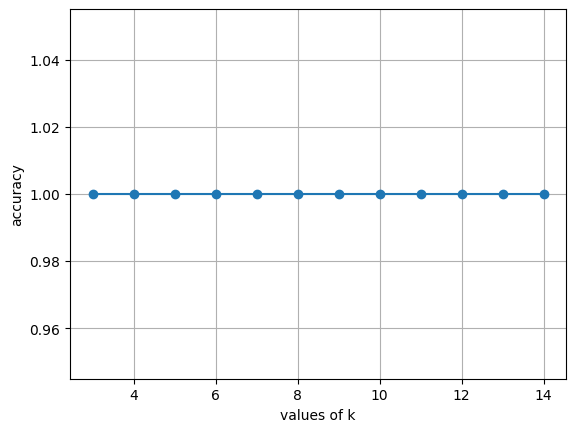

In [40]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('values of k')
plt.ylabel('accuracy')
plt.grid()

In [41]:
k_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
k_model.fit(x_train,y_train)
y_pred=k_model.predict(x_test)
acc= accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [42]:
#svm model
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print(acc)

1.0


In [43]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print(acc)

1.0
